### Decision Trees!

Initially, let's take a sample dataset which is a binary classification and see how the decision tree is generated!

In [1]:
from sklearn import tree
from sklearn import metrics
import seaborn
import matplotlib.pyplot as plt
import numpy as np
dataset=np.array([[1],[2],[3],[4],[5]])
labels=np.array([[1],[1],[0],[0],[1]])
dataset,labels

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1],
        [1],
        [0],
        [0],
        [1]]))

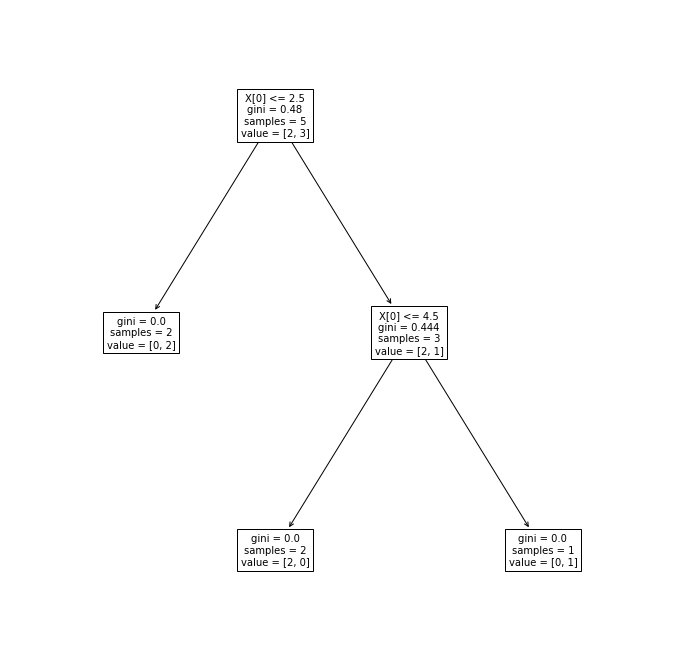

In [2]:
sample_tree=tree.DecisionTreeClassifier(max_depth=2)
sample_tree=sample_tree.fit(dataset,labels)

from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plt.title("Decision tree trained on all the iris features")
tree.plot_tree(sample_tree, fontsize=10)
#plt.savefig('tree_high_dpi', dpi=100)
plt.show()

we've got the dataset and the labels now! so, this is just a binary classification and I'll now explain how the decision tree gets generated for this dataset!

### Best split is all about the higher impurity gap!

Initially, we will have various thresholds depending on the dataset and since our dataset is a number range, the split thresholds will be [1.5,2.5,3.5,4.5] in which a dataset is splitted as the values less than threshold and greater than or equal to threshold.

Now, for each threshold, we will have an objective function Gini index and the impurity gap calculation. In a Decision Tree Classifier, the decision condition is taken on a split that maximises the impurity gap, a node which has dataset belonging to a single class is called as a pure node and if it has more than 1 class, then it's an impure node!


All the pure nodes are called as leaf nodes!

In [3]:
threshold=[1.5,2.5,3.5,4.5]
d=[1,2,3,4,5]
l=[1,1,0,0,1]

#This below function calculates the probabilities of the labels and returns

def calculate_probs(lst):
    p=[]
    zc=0
    oc=0
    for i in lst:
        if i==0:
            zc+=1
        elif i==1:
            oc+=1
    p.append(zc/len(lst))
    p.append(oc/len(lst))
    return p


# Function calculate_gini returns the calculated gini index value
def calculate_gini(probs_lst):
    g=0.0
    for i in probs_lst:
        g+=i*(1-i)
    return g

impurity_for_whole_dataset= len(d)*calculate_gini(calculate_probs(l))

impurity_dict={}
for i in threshold:
    ls=[]
    rs=[]
    ls=[l[j] for j in range(0,len(d)) if d[j]<i]
    rs=[l[k] for k in range(0,len(d)) if d[k]>=i]
    print('The threshold is ',i)
    print('The left region is ',ls)
    print('The right region is ',rs)
    print("In the left region")
    probs=calculate_probs(ls)
    print("The probabilities of labels are ", probs)
    l_gini=calculate_gini(probs)
    print("The gini value for this region is ", l_gini)
    print("In the right region")
    probs=calculate_probs(rs)
    print("The probabilities of labels are ", probs)
    r_gini=calculate_gini(probs)
    print("The gini value for this region is ", r_gini)
    impurity=impurity_for_whole_dataset-(len(ls)*l_gini + len(rs)*r_gini)
    impurity_dict[i]=impurity
    print("Impurity in this split is "+str(impurity))
    print("***************")
print("The best threshold came with the split "+str(max(impurity_dict, key=impurity_dict.get)))

The threshold is  1.5
The left region is  [1]
The right region is  [1, 0, 0, 1]
In the left region
The probabilities of labels are  [0.0, 1.0]
The gini value for this region is  0.0
In the right region
The probabilities of labels are  [0.5, 0.5]
The gini value for this region is  0.5
Impurity in this split is 0.3999999999999999
***************
The threshold is  2.5
The left region is  [1, 1]
The right region is  [0, 0, 1]
In the left region
The probabilities of labels are  [0.0, 1.0]
The gini value for this region is  0.0
In the right region
The probabilities of labels are  [0.6666666666666666, 0.3333333333333333]
The gini value for this region is  0.4444444444444445
Impurity in this split is 1.0666666666666664
***************
The threshold is  3.5
The left region is  [1, 1, 0]
The right region is  [0, 1]
In the left region
The probabilities of labels are  [0.3333333333333333, 0.6666666666666666]
The gini value for this region is  0.4444444444444445
In the right region
The probabilitie

Now similarly the process is iterated with the left split and right split regions and this same process is repeated and the next split threshold is around 4.5 and then that gives us final pure nodes!

This is how the decision tree splits the data and this goes on until all the leaf nodes belong to a single class.

Let's apply this to a dataset and understand the significance of Decision Trees!


In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
wine_data = pd.read_csv("./archive/winequality-red.csv")

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [7]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [8]:
wine_data.loc[:,"quality"]=wine_data.quality.map(quality_mapping)

In [9]:
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [10]:
wine_data.shape

(1599, 12)

In [11]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
wine_data_data=wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [13]:
wine_data_target=wine_data[['quality']]

To apply any ML algorithm, we need to split the available dataset into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine_data_data,wine_data_target,random_state=9)

In [15]:
X_train.shape, y_train.shape

((1199, 11), (1199, 1))

In [16]:
X_test.shape,y_test.shape

((400, 11), (400, 1))

In [17]:
from sklearn import tree
from sklearn import metrics

clf=tree.DecisionTreeClassifier(max_depth=3)
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
train_predicitons=clf.predict(X_train)

In [19]:
train_predicitons.shape

(1199,)

In [20]:
metrics.accuracy_score(train_predicitons,y_train)

0.603836530442035

In [21]:
test_predictions=clf.predict(X_test)
metrics.accuracy_score(test_predictions,y_test)

0.545

Not so good on both training and testing sets:

Let's try with various tree depth values and display it!

In [22]:
from sklearn import tree
from sklearn import metrics
training_accuracy=[]
testing_accuracy=[]
for i in range(1,25):
    
    my_tree=tree.DecisionTreeClassifier(max_depth=i)
    my_tree.fit(X_train,y_train)
    train_score=metrics.accuracy_score(my_tree.predict(X_train),y_train)
    test_score=metrics.accuracy_score(my_tree.predict(X_test),y_test)
    training_accuracy.append(train_score)
    testing_accuracy.append(test_score)



In [23]:
training_accuracy

[0.5571309424520434,
 0.5571309424520434,
 0.603836530442035,
 0.6330275229357798,
 0.6688907422852377,
 0.7172643869891576,
 0.7648040033361134,
 0.8115095913261051,
 0.8423686405337781,
 0.8748957464553795,
 0.9124270225187656,
 0.9424520433694745,
 0.969140950792327,
 0.9841534612176814,
 0.9949958298582152,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [24]:
testing_accuracy

[0.57,
 0.57,
 0.545,
 0.59,
 0.5975,
 0.5975,
 0.6325,
 0.62,
 0.625,
 0.6275,
 0.62,
 0.6275,
 0.625,
 0.61,
 0.6275,
 0.605,
 0.6175,
 0.635,
 0.625,
 0.605,
 0.6275,
 0.615,
 0.6375,
 0.62]

In [25]:
import seaborn
import matplotlib.pyplot as plt


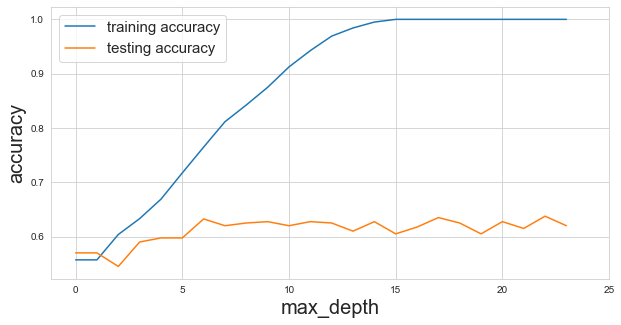

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(training_accuracy,label="training accuracy")
plt.plot(testing_accuracy,label="testing accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We can see that the model with depth starting at 14 has higher accuracy of 1 which is from then onwards, it's overfitted which is not a generic model and can't give better results on different testing set. 


For testing set, the good accuracy is obtained at around 12, so generalized max_depth value can be taken as 12

In [27]:
my_final_tree=tree.DecisionTreeClassifier(max_depth=11)
my_final_tree=my_final_tree.fit(X_train,y_train)

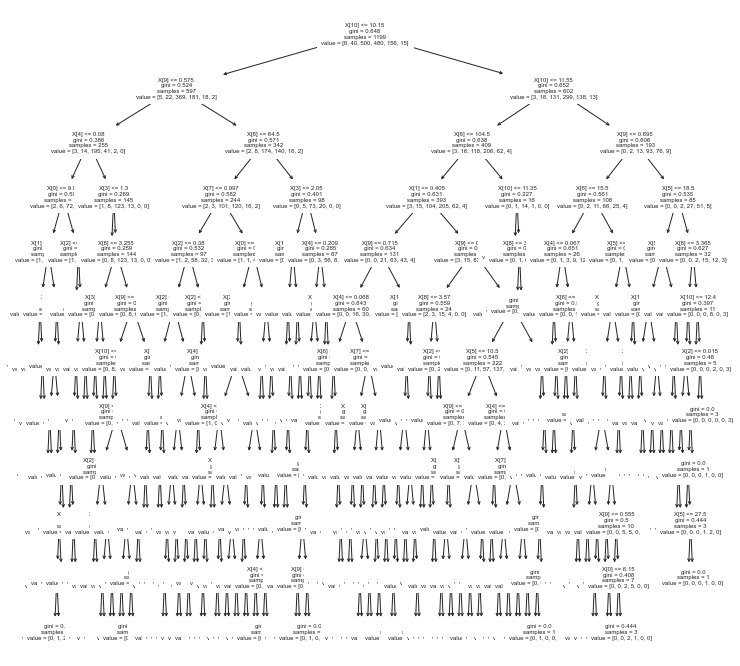

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plt.title("Decision tree trained on all the iris features")
tree.plot_tree(my_final_tree, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

This is not a great look of the tree but yeah this is how the tree gets generated as per the training data!